## Segmentasi 

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#202331129 Daniel David Hamonangan Hutabarat

In [15]:
img_bgr = cv2.imread('gambar3.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
#202331129 Daniel David Hamonangan Hutabarat

In [16]:
lower_orange = np.array([10, 100, 100])
upper_orange = np.array([25, 255, 255])
mask_buah_awal = cv2.inRange(hsv_img, lower_orange, upper_orange)


lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])
mask_daun_awal = cv2.inRange(hsv_img, lower_green, upper_green)
#202331129 Daniel David Hamonangan Hutabarat

kernel = np.ones((5,5),np.uint8)
mask_buah_cleaned = cv2.morphologyEx(mask_buah_awal, cv2.MORPH_CLOSE, kernel)
mask_daun_cleaned = cv2.morphologyEx(mask_daun_awal, cv2.MORPH_CLOSE, kernel)



contours_buah, _ = cv2.findContours(mask_buah_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_daun, _ = cv2.findContours(mask_daun_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

height, width, _ = img_rgb.shape
mask_buah_final = np.zeros((height, width), dtype=np.uint8)
mask_daun_final = np.zeros((height, width), dtype=np.uint8)


if contours_buah:
    fruit_contour = max(contours_buah, key=cv2.contourArea)
    cv2.drawContours(mask_buah_final, [fruit_contour], -1, (255), thickness=cv2.FILLED)


if contours_daun:
    cv2.drawContours(mask_daun_final, contours_daun, -1, (255), thickness=cv2.FILLED)


mask_daun_final = cv2.bitwise_and(mask_daun_final, cv2.bitwise_not(mask_buah_final))


segmentasi_buah = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_buah_final)
segmentasi_daun = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_daun_final)
#202331129 Daniel David Hamonangan Hutabarat




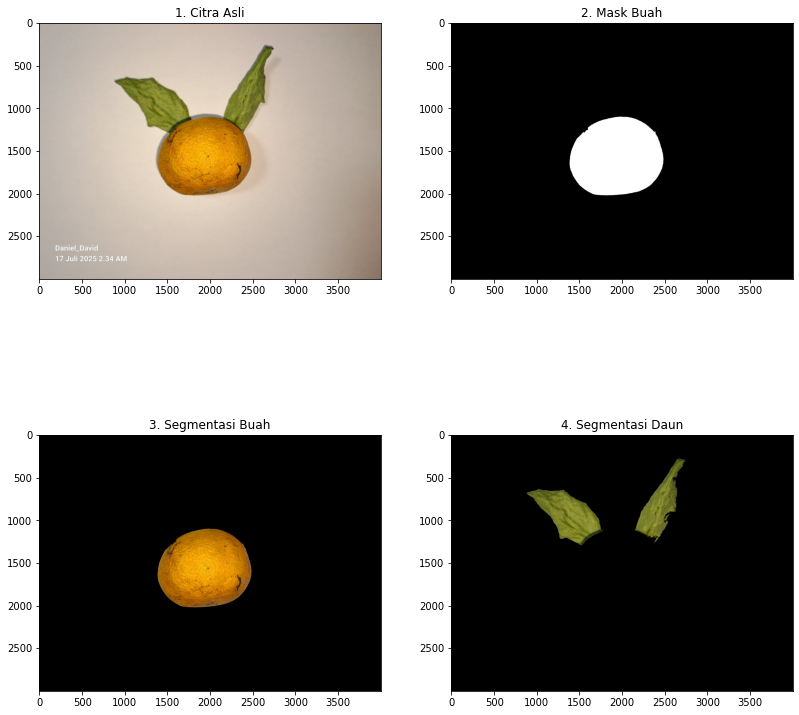

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.tight_layout(pad=4.0)


axs[0, 0].imshow(img_rgb)
axs[0, 0].set_title('1. Citra Asli')

axs[0, 1].imshow(mask_buah_final, cmap='gray')
axs[0, 1].set_title('2. Mask Buah')

axs[1, 0].imshow(segmentasi_buah)
axs[1, 0].set_title('3. Segmentasi Buah')

axs[1, 1].imshow(segmentasi_daun)
axs[1, 1].set_title('4. Segmentasi Daun')

plt.show()
#202331129 Daniel David Hamonangan Hutabarat